In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
%matplotlib inline

# Transformée de Fourier d’une image synthétique

In [2]:
def sq_grid_img(d, dim=(50, 50)):
    w, h = dim
    return np.array([[(1.0 if x % d == 0 or y % d == 0 else 0.0) for x in range(w)]
                     for y in range(h)])

In [3]:
def dftQ1(d):
    img = sq_grid_img(d)
    fft = np.fft.fft2(img)
    return img, fft, np.fft.fftshift(fft)

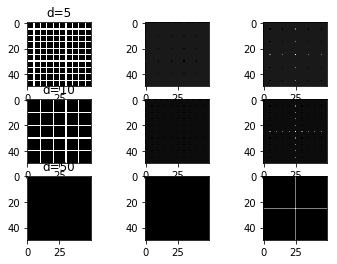

In [7]:
for i, d in enumerate((5, 10, 50)):
    img, fft, sfft = dftQ1(d)
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'd={d}')
    plt.subplot(3, 3, i * 3 + 2)
    plt.imshow(fft.real, cmap='gray')
    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(sfft.real, cmap='gray')

# Transform ́ee de Fourier d’une image r ́eelle

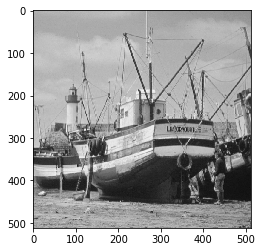

In [6]:
boat = mimg.imread('images/boat512.gif')
plt.imshow(boat, cmap='gray')

In [67]:
def mapplot_fft(x, *fs):
    for i, f in enumerate(fs):
        plt.subplot(1, len(fs), i + 1)
        f, title = f if isinstance(f, tuple) else (f, None)
        plt.imshow(f(x).real, cmap='gray')
        if title:
            plt.title(title)

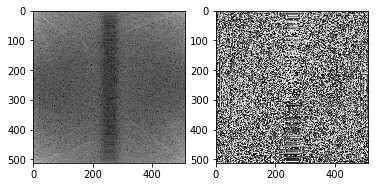

In [64]:
mapplot_fft(np.fft.fft2(boat), lambda fft: np.absolute(np.log(fft)), np.angle)

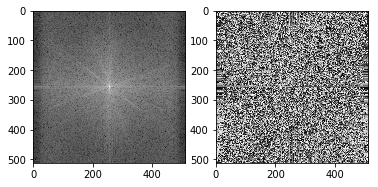

In [65]:
mapplot_fft(np.fft.fftshift(np.fft.fft2(boat)), lambda fft: np.absolute(np.log(fft)), np.angle)

In [55]:
def comp(*fs):
    if len(fs) == 1:
        return fs[0]
    return lambda *x: fs[0](comp(*fs[1:])(*x))

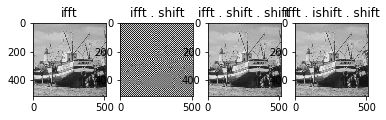

In [66]:
mapplot_fft(np.fft.fft2(boat),
            (np.fft.ifft2, 'ifft'),
            (comp(np.fft.ifft2, np.fft.fftshift), 'ifft . shift'),
            (comp(np.fft.ifft2, np.fft.fftshift, np.fft.fftshift), 'ifft . shift . shift'),
            (comp(np.fft.ifft2, np.fft.ifftshift, np.fft.fftshift), 'ifft . ishift . shift'))